# Alberto Rodríguez Reyes A01383805

In [ ]:
import json
import requests
import os
import zipfile
import geopandas as gpd 
import pandas as pd
import io
#import contextily as cx

In [ ]:
df_co=pd.read_csv('/work/Coahuila/conjunto_de_datos_ageb_urbana_05_cpv2020.csv')
df_co

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,5,Coahuila de Zaragoza,0,Total de la entidad Coahuila de Zaragoza,0,Total de la entidad,0000,0,3146771,1583102,...,372132,824291,519599,443659,195883,124077,17020,46420,332298,5754
1,5,Coahuila de Zaragoza,1,Abasolo,0,Total del municipio,0000,0,1022,487,...,46,318,40,187,14,21,7,28,265,4
2,5,Coahuila de Zaragoza,1,Abasolo,1,Total de la localidad urbana,0000,0,735,362,...,40,223,31,131,12,20,3,15,175,*
3,5,Coahuila de Zaragoza,1,Abasolo,1,Total AGEB urbana,0087,0,735,362,...,40,223,31,131,12,20,3,15,175,*
4,5,Coahuila de Zaragoza,1,Abasolo,1,Abasolo,0087,1,5,*,...,*,*,*,*,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61051,5,Coahuila de Zaragoza,38,Zaragoza,1,Zaragoza,1441,19,0,0,...,0,0,0,0,0,0,0,0,0,0
61052,5,Coahuila de Zaragoza,38,Zaragoza,1,Zaragoza,1441,20,5,*,...,*,*,*,*,*,*,*,*,*,*
61053,5,Coahuila de Zaragoza,38,Zaragoza,1,Zaragoza,1441,21,0,0,...,0,0,0,0,0,0,0,0,0,0
61054,5,Coahuila de Zaragoza,38,Zaragoza,1,Zaragoza,1441,22,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_co = df_co.replace('*', pd.NA)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_co.isnull().sum()

ENTIDAD            0
NOM_ENT            0
MUN                0
NOM_MUN            0
LOC                0
NOM_LOC            0
AGEB               0
MZA                0
POBTOT             0
POBFEM          5031
POBMAS          5004
P_0A2          21149
P_0A2_F        24140
P_0A2_M        24196
P_3YMAS         4808
P_3YMAS_F       5069
P_3YMAS_M       5038
P_5YMAS         4808
P_5YMAS_F       5094
P_5YMAS_M       5062
P_12YMAS        4809
P_12YMAS_F      5181
P_12YMAS_M      5186
P_15YMAS        4810
P_15YMAS_F      5234
P_15YMAS_M      5258
P_18YMAS        4811
P_18YMAS_F      5333
P_18YMAS_M      5349
P_3A5          20614
P_3A5_F        24213
P_3A5_M        24301
P_6A11         14591
P_6A11_F       21062
P_6A11_M       21017
P_8A14         13295
P_8A14_F       20066
P_8A14_M       19757
P_12A14        21782
P_12A14_F      25080
P_12A14_M      24816
P_15A17        21668
P_15A17_F      25012
P_15A17_M      25113
P_18A24        13183
P_18A24_F      20113
P_18A24_M      19911
P_15A49_F    

In [ ]:
df_co_limpio=df_co[['ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','NOM_LOC','AGEB','MZA','POBTOT','P_12A14_F','P_15A49_F','P_0A2','P_3A5','P12YM_CASA','PCATOLICA','PRO_CRIEVA','POTRAS_REL','PSIN_RELIG','POCUPADA','GRAPROES','VPH_SINCINT','PDER_SS']]
df_co_limpio=df_co_limpio[df_co_limpio.apply(lambda row:all(row != '*'), axis=1)]
df_co_limpio=df_co_limpio[df_co_limpio.apply(lambda row:all(row != 'N/D'), axis=1)]
series_religiones=df_co_limpio['PCATOLICA'].astype(int)+df_co_limpio['PRO_CRIEVA'].astype(int)+df_co_limpio['POTRAS_REL'].astype(int)
series_14_a_59=df_co_limpio['P_12A14_F'].astype(int)+df_co_limpio['P_15A49_F'].astype(int)
df_co_limpio['P_0A2']=df_co_limpio['P_0A2'].astype(int)+df_co_limpio['P_3A5'].astype(int)
df_co_limpio.insert(13,'Personas c/religion',series_religiones)
df_co_limpio.insert(8,'Mujeres de 12-49',series_14_a_59)
df_co_limpio=df_co_limpio.drop(['PCATOLICA','PRO_CRIEVA','POTRAS_REL','P_12A14_F','P_15A49_F','P_3A5'],axis=1)
df_co_limpio.rename(columns={'PDER_SS':'Personas C/Servicio de Salud','VPH_SINCINT': 'Personas S/Internet','GRAPROES': 'Prom. Grado Escolar','POCUPADA': 'Personas Ocupadas','POBTOT': 'Poblacion Total','P12YM_CASA': 'Personas Casadas','P_0A2': 'Poblacion de 0 a 5','PSIN_RELIG':'Personas s/religion','PROM_HNV':'Promedio de nacidos','GRAP':'Personas Separadas'},inplace =True)
df_co_limpio

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Prom. Grado Escolar,Personas S/Internet,Personas C/Servicio de Salud
6,5,Coahuila de Zaragoza,1,Abasolo,1,Abasolo,0087,3,0,0,0,0,0,0,0,0.0,0,0
13,5,Coahuila de Zaragoza,1,Abasolo,1,Abasolo,0087,13,28,73,9,54,27,19,23,9.26,15,41
19,5,Coahuila de Zaragoza,1,Abasolo,1,Abasolo,0087,19,0,0,0,0,0,0,0,0.0,0,0
32,5,Coahuila de Zaragoza,1,Abasolo,1,Abasolo,0087,32,0,0,0,0,0,0,0,0.0,0,0
36,5,Coahuila de Zaragoza,1,Abasolo,1,Abasolo,0087,37,0,0,0,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61048,5,Coahuila de Zaragoza,38,Zaragoza,1,Zaragoza,1441,16,0,0,0,0,0,0,0,0.0,0,0
61051,5,Coahuila de Zaragoza,38,Zaragoza,1,Zaragoza,1441,19,0,0,0,0,0,0,0,0.0,0,0
61053,5,Coahuila de Zaragoza,38,Zaragoza,1,Zaragoza,1441,21,0,0,0,0,0,0,0,0.0,0,0
61054,5,Coahuila de Zaragoza,38,Zaragoza,1,Zaragoza,1441,22,0,0,0,0,0,0,0,0.0,0,0


In [ ]:
df_co_limpio.query("~NOM_LOC.str.startswith('Total')",inplace=True)

In [ ]:
df_co_limpio.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Prom. Grado Escolar,Personas S/Internet,Personas C/Servicio de Salud
6,5,Coahuila de Zaragoza,1,Abasolo,1,Abasolo,0087,3,0,0,0,0,0,0,0,0.00,0,0
13,5,Coahuila de Zaragoza,1,Abasolo,1,Abasolo,0087,13,28,73,9,54,27,19,23,9.26,15,41
19,5,Coahuila de Zaragoza,1,Abasolo,1,Abasolo,0087,19,0,0,0,0,0,0,0,0.00,0,0
32,5,Coahuila de Zaragoza,1,Abasolo,1,Abasolo,0087,32,0,0,0,0,0,0,0,0.00,0,0
36,5,Coahuila de Zaragoza,1,Abasolo,1,Abasolo,0087,37,0,0,0,0,0,0,0,0.00,0,0


## Exploración de los datos

In [ ]:
df_co_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16511 entries, 6 to 61055
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ENTIDAD                       16511 non-null  int64 
 1   NOM_ENT                       16511 non-null  object
 2   MUN                           16511 non-null  int64 
 3   NOM_MUN                       16511 non-null  object
 4   LOC                           16511 non-null  int64 
 5   NOM_LOC                       16511 non-null  object
 6   AGEB                          16511 non-null  object
 7   MZA                           16511 non-null  int64 
 8   Mujeres de 12-49              16511 non-null  int64 
 9   Poblacion Total               16511 non-null  int64 
 10  Poblacion de 0 a 5            16511 non-null  int64 
 11  Personas c/religion           16511 non-null  int64 
 12  Personas Casadas              16511 non-null  object
 13  Personas s/religion  

In [ ]:
df_co_limpio["Personas Casadas"] = df_co_limpio["Personas Casadas"].astype("Int64")
df_co_limpio["Personas s/religion"] = df_co_limpio["Personas s/religion"].astype("Int64")
df_co_limpio["Personas Ocupadas"] = df_co_limpio["Personas Ocupadas"].astype("Int64")
df_co_limpio["Prom. Grado Escolar"] = df_co_limpio["Prom. Grado Escolar"].astype("Float64")
df_co_limpio["Personas S/Internet"] = df_co_limpio["Personas S/Internet"].astype("Int64")
df_co_limpio["Personas C/Servicio de Salud"] = df_co_limpio["Personas C/Servicio de Salud"].astype("Int64")

In [ ]:
df_co_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16511 entries, 6 to 61055
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ENTIDAD                       16511 non-null  int64  
 1   NOM_ENT                       16511 non-null  object 
 2   MUN                           16511 non-null  int64  
 3   NOM_MUN                       16511 non-null  object 
 4   LOC                           16511 non-null  int64  
 5   NOM_LOC                       16511 non-null  object 
 6   AGEB                          16511 non-null  object 
 7   MZA                           16511 non-null  int64  
 8   Mujeres de 12-49              16511 non-null  int64  
 9   Poblacion Total               16511 non-null  int64  
 10  Poblacion de 0 a 5            16511 non-null  int64  
 11  Personas c/religion           16511 non-null  int64  
 12  Personas Casadas              16511 non-null  Int64  
 13  Person

In [ ]:
# Dimensión del dataset
num_registros = len(df_co_limpio)
num_columnas = len(df_co_limpio.columns)
print (num_registros)
print (num_columnas)

16511
18


In [ ]:
df_co_limpio.shape

(16511, 18)

In [ ]:
df_co_limpio.isnull().sum()

ENTIDAD                         0
NOM_ENT                         0
MUN                             0
NOM_MUN                         0
LOC                             0
NOM_LOC                         0
AGEB                            0
MZA                             0
Mujeres de 12-49                0
Poblacion Total                 0
Poblacion de 0 a 5              0
Personas c/religion             0
Personas Casadas                0
Personas s/religion             0
Personas Ocupadas               0
Prom. Grado Escolar             0
Personas S/Internet             0
Personas C/Servicio de Salud    0
dtype: int64

# Medias estadísticas

In [ ]:
medidas_estadisticas_cuantitativas = df_co_limpio.describe()
medidas_estadisticas_cuantitativas
# cuenta, media, desviación estándar, mínimos, cuartiles, máximos

,ENTIDAD,MUN,LOC,MZA,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Prom. Grado Escolar,Personas S/Internet,Personas C/Servicio de Salud
count,16511.0,16511.000000,16511.000000,16511.000000,16511.000000,16511.000000,16511.000000,16511.000000,16511.0,16511.0,16511.0,16511.0,16511.0,16511.0
mean,5.0,25.267761,4.589970,27.649446,17.571377,57.706620,7.042457,50.116771,24.91654,7.458603,26.596935,5.139116,5.597299,46.926534
std,0.0,9.822098,24.079374,41.305345,26.079308,83.883108,10.671532,74.768050,36.521564,13.127653,40.253806,5.278484,8.940274,69.426739
min,5.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,5.0,19.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,5.0,30.000000,1.000000,22.000000,0.000000,9.000000,0.000000,7.000000,4.0,0.0,4.0,6.43,0.0,5.0
75%,5.0,32.000000,1.000000,37.000000,31.000000,101.000000,12.000000,87.000000,44.0,11.0,46.0,9.91,9.0,81.0
max,5.0,38.000000,453.000000,800.000000,433.000000,1573.000000,194.000000,1409.000000,698.0,210.0,826.0,17.17,193.0,1335.0


In [ ]:
# moda de los datos
df_co_limpio.mode()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Prom. Grado Escolar,Personas S/Internet,Personas C/Servicio de Salud
0,5,Coahuila de Zaragoza,30,Saltillo,1,Saltillo,3153,1,0,0,0,0,0,0,0,0.0,0,0


In [ ]:
# Varianza de las variables cuantitativas
# Filtrar solo las columnas numéricas
columnas_numericas = df_co_limpio.select_dtypes(include='number')

# Calcular la varianza para las columnas numéricas
columnas_numericas.var()

ENTIDAD                                 0.0
MUN                               96.473606
LOC                              579.816239
MZA                             1706.131496
Mujeres de 12-49                 680.130323
Poblacion Total                 7036.375825
Poblacion de 0 a 5               113.881601
Personas c/religion             5590.261228
Personas Casadas                1333.824651
Personas s/religion              172.335279
Personas Ocupadas               1620.368904
Prom. Grado Escolar               27.862396
Personas S/Internet               79.928494
Personas C/Servicio de Salud    4820.072071
dtype: Float64

In [ ]:
columnas_numericas.median()

ENTIDAD                          5.0
MUN                             30.0
LOC                              1.0
MZA                             22.0
Mujeres de 12-49                 0.0
Poblacion Total                  9.0
Poblacion de 0 a 5               0.0
Personas c/religion              7.0
Personas Casadas                 4.0
Personas s/religion              0.0
Personas Ocupadas                4.0
Prom. Grado Escolar             6.43
Personas S/Internet              0.0
Personas C/Servicio de Salud     5.0
dtype: Float64

In [ ]:
# Cálculo rango 
columnas_numericas.max() - columnas_numericas.min()

ENTIDAD                            0.0
MUN                               37.0
LOC                              452.0
MZA                              799.0
Mujeres de 12-49                 433.0
Poblacion Total                 1573.0
Poblacion de 0 a 5               194.0
Personas c/religion             1409.0
Personas Casadas                 698.0
Personas s/religion              210.0
Personas Ocupadas                826.0
Prom. Grado Escolar              17.17
Personas S/Internet              193.0
Personas C/Servicio de Salud    1335.0
dtype: Float64

In [ ]:
# Variables cualitativas 
# Tabla de distribución de frecuencia
# Moda
# Seleccionar solo las columnas no numéricas
columnas_categoricas = df_co_limpio.select_dtypes(include='object')

# Calcular la tabla de distribución de frecuencia para cada columna categórica
tabla_frecuencia_categorica = pd.DataFrame()
moda_variables_categoricas = pd.DataFrame()

for columna in columnas_categoricas.columns:
    tabla_frecuencia_categorica[columna] = df_co_limpio[columna].value_counts()
    moda_variables_categoricas[columna] = [df_co_limpio[columna].mode().values[0]]

# Mostrar la tabla de distribución de frecuencia
print("Tabla de distribución de frecuencia para variables cualitativas:")
print(tabla_frecuencia_categorica)

# Mostrar la moda para variables cualitativas
print("\nModa para variables cualitativas:")
print(moda_variables_categoricas)

Tabla de distribución de frecuencia para variables cualitativas:
                      NOM_ENT  NOM_MUN  NOM_LOC  AGEB
NOM_ENT                                              
Coahuila de Zaragoza    16511      NaN      NaN   NaN

Moda para variables cualitativas:
                NOM_ENT   NOM_MUN   NOM_LOC  AGEB
0  Coahuila de Zaragoza  Saltillo  Saltillo  3153


## Exploración datos con herramientas de visualización

# Variables cuantitativas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Variables cuantitativas
columnas_numericas1 = df_co_limpio.select_dtypes(include=['int', 'float'])

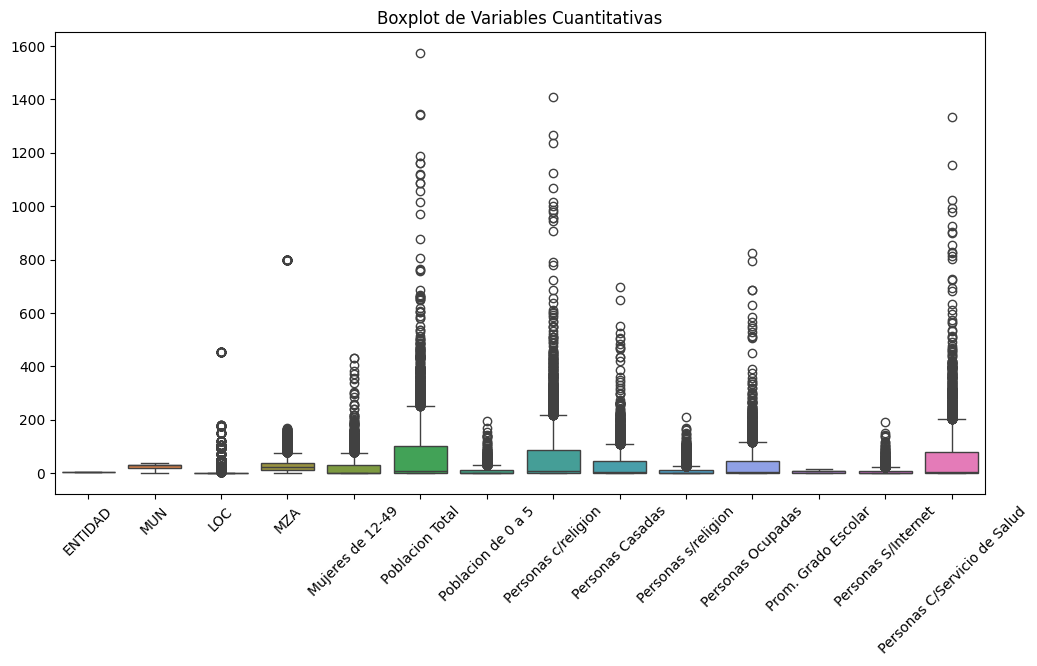

In [ ]:
# Medidas de posición no-central: cuartiles, outlier (valores atípicos), boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=columnas_numericas1)
plt.title('Boxplot de Variables Cuantitativas')
plt.xticks(rotation=45)
plt.show()

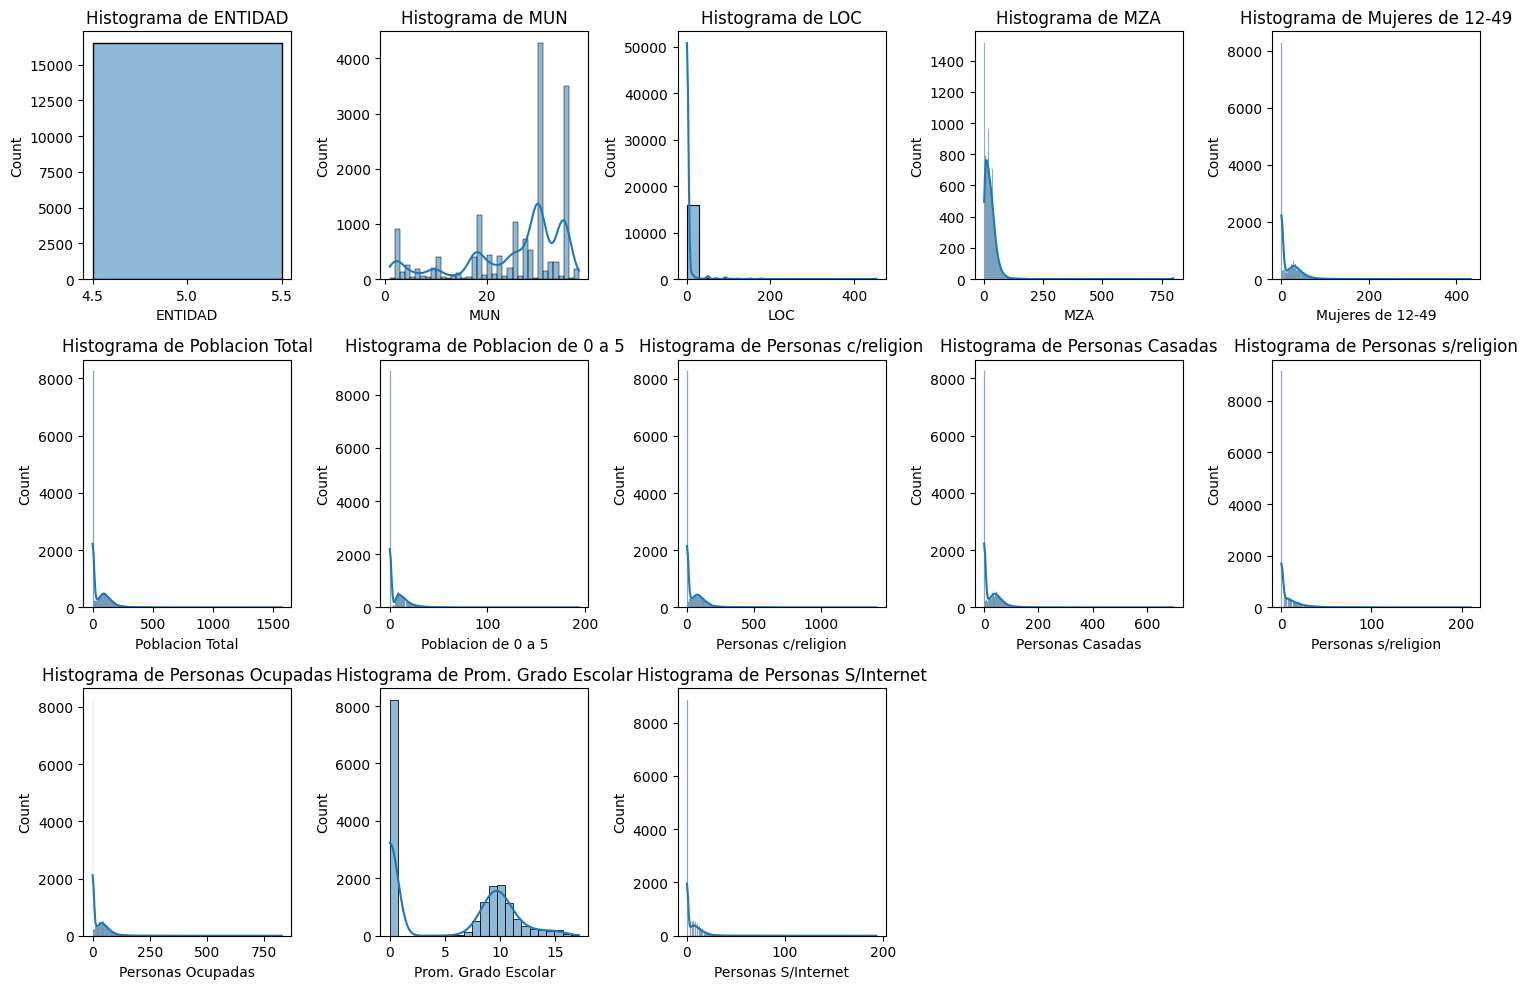

In [ ]:
# Análisis de distribución de los datos (Histogramas). 
import math

plt.figure(figsize=(15, 10))
num_plots = min(len(columnas_numericas1.columns), 13)  # Limitar el número de subgráficos a 13
num_filas = math.ceil(num_plots / 5)  # Calcular el número de filas necesario
num_columnas = min(num_plots, 5)  # Limitar el número de columnas a 5

for i, columna in enumerate(columnas_numericas1.columns[:num_plots], 1):
    plt.subplot(num_filas, num_columnas, i)
    sns.histplot(data=columnas_numericas1, x=columna, kde=True)
    plt.title(f'Histograma de {columna}')

plt.tight_layout()
plt.show()

In [ ]:
Se puede ver que en los únicos casos donde existe una forma un poco simétrica en los datos es
en el histograma de municipios, de mujeres de 12 a 49 años y en el promedio de grado escolar.
En una parte del histograma de promedio de grado escolar y de mujeres de 12 a 49 años, inclusive
pareciera que un rango de datos se distribuyen de manera normal.

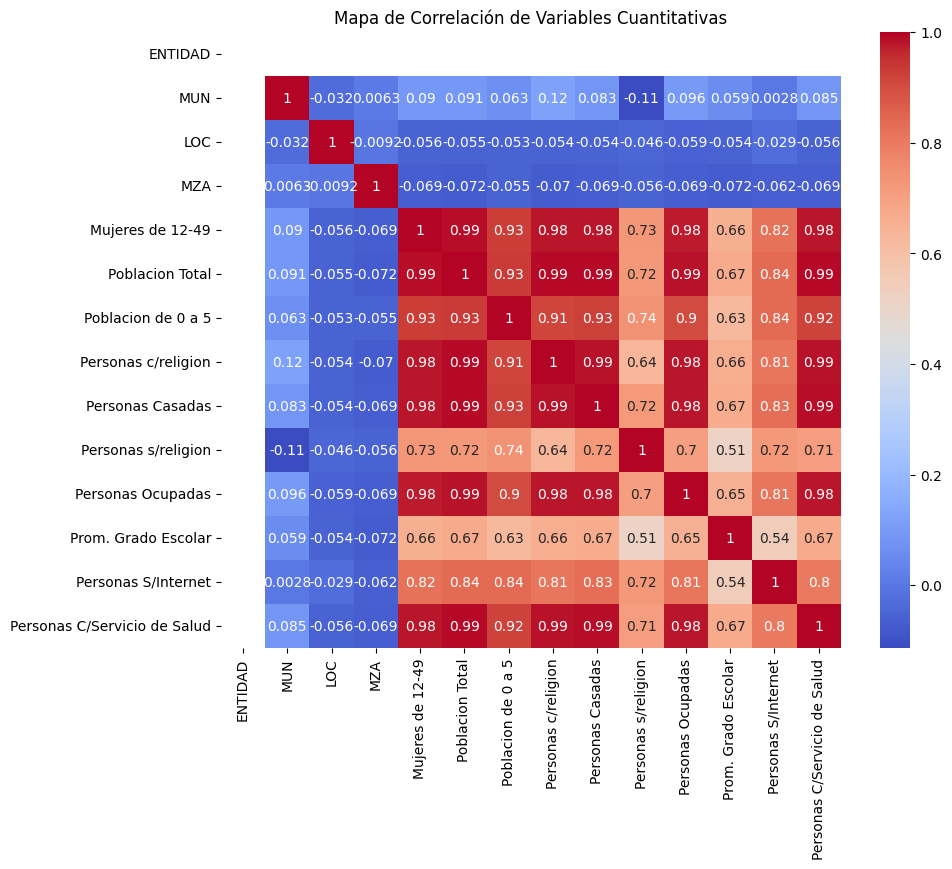

In [ ]:
# 3. Análisis de correlación de los datos, mapa de color
plt.figure(figsize=(10, 8))
sns.heatmap(columnas_numericas1.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlación de Variables Cuantitativas')
plt.show()

# Variables cualitativas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

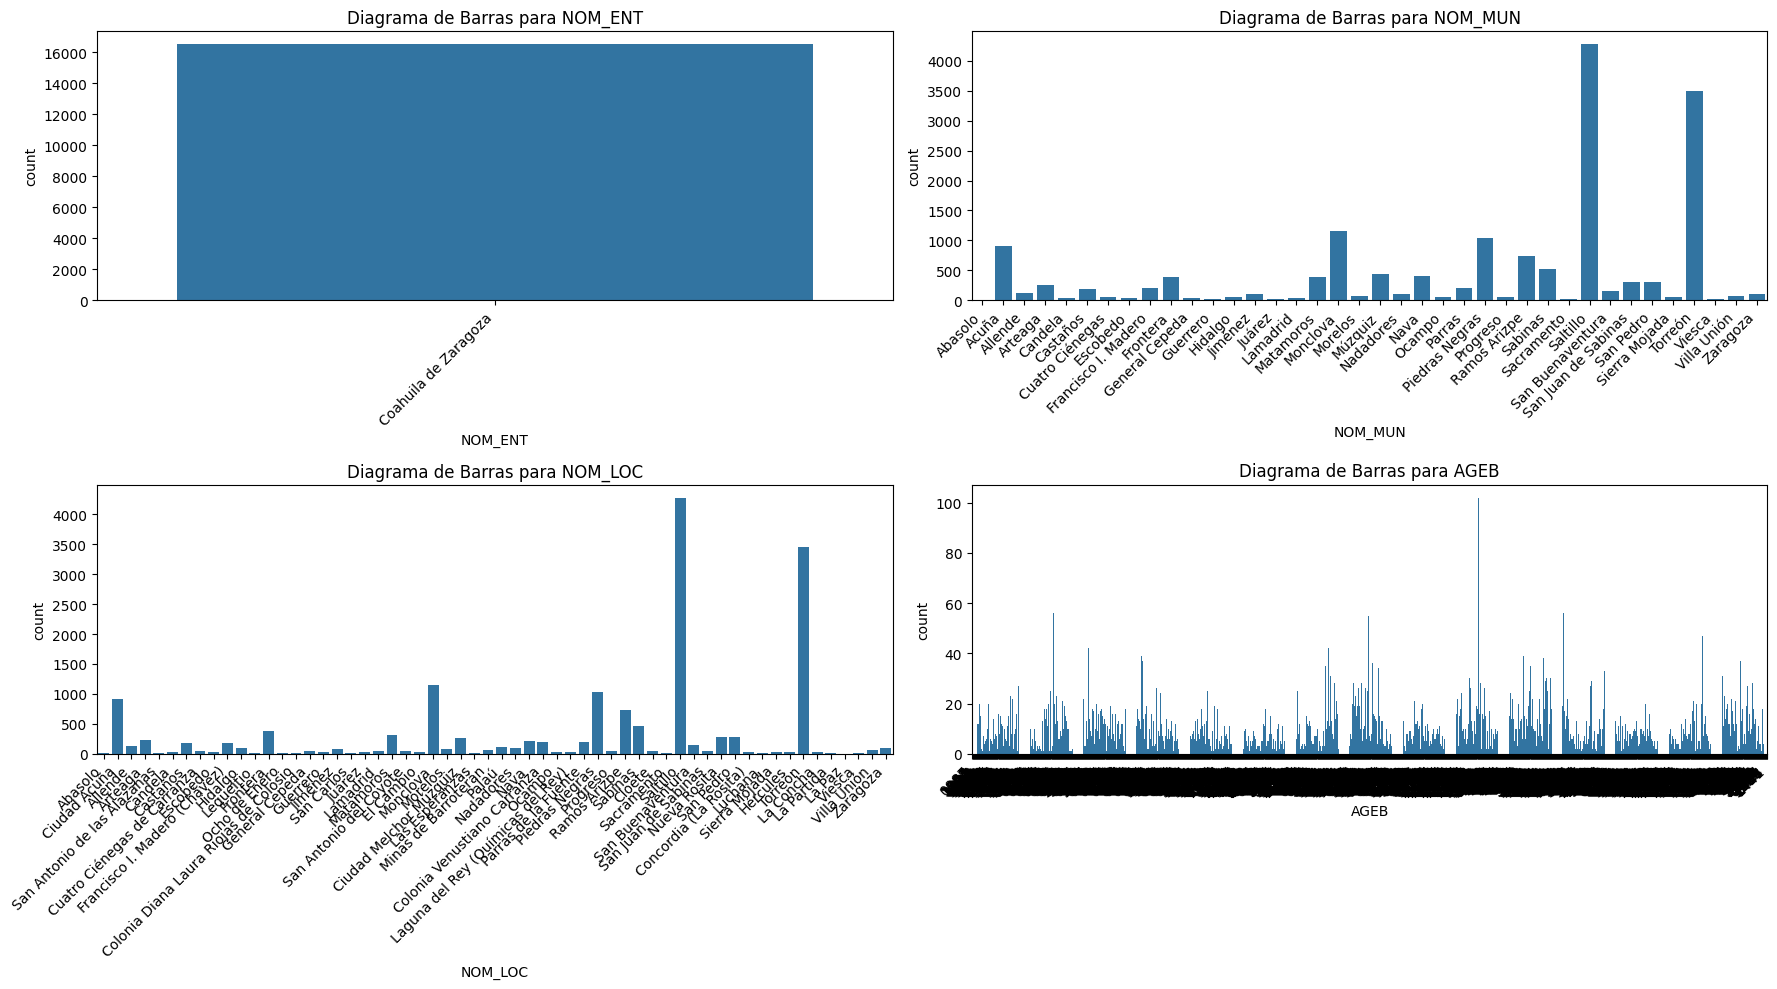

In [ ]:
# Distribución de los datos (diagramas de barras)
plt.figure(figsize=(18, 10))  
for i, columna in enumerate(columnas_categoricas.columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_co_limpio, x=columna)
    plt.title(f'Diagrama de Barras para {columna}')
    plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

plt.tight_layout()
plt.show()

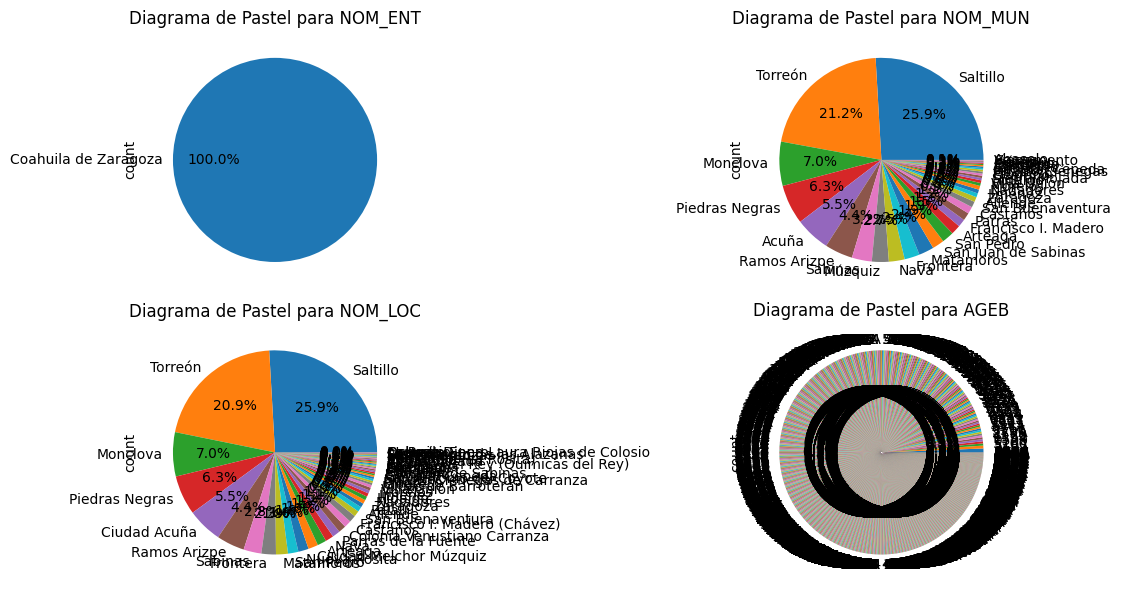

In [ ]:
# Diagrama de pastel
plt.figure(figsize=(12, 6))
for i, columna in enumerate(columnas_categoricas.columns, 1):
    plt.subplot(2, 2, i)
    df_co_limpio[columna].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Diagrama de Pastel para {columna}')

plt.tight_layout()
plt.show()

In [ ]:
# Tablas de contingencia
for columna in columnas_categoricas.columns:
    tabla_contingencia = pd.crosstab(index=df_co_limpio[columna], columns=df_co_limpio['Poblacion de 0 a 5'])
    print(f"Tabla de Contingencia para {columna} vs Poblacion de 0 a 5:")
    print(tabla_contingencia)
    print("\n")

Tabla de Contingencia para NOM_ENT vs Poblacion de 0 a 5:
Poblacion de 0 a 5     0    3    4    5    6    7    8    9    10   11   ...  \
NOM_ENT                                                                  ...   
Coahuila de Zaragoza  8879  239   99   63  311  461  538  573  519  494  ...   

Poblacion de 0 a 5    121  131  137  139  140  141  143  155  168  194  
NOM_ENT                                                                 
Coahuila de Zaragoza    1    1    1    1    1    1    1    1    1    1  

[1 rows x 98 columns]


Tabla de Contingencia para NOM_MUN vs Poblacion de 0 a 5:
Poblacion de 0 a 5    0    3    4    5    6    7    8    9    10   11   ...  \
NOM_MUN                                                                 ...   
Abasolo                 9    1    0    0    0    0    0    1    0    0  ...   
Acuña                 400   19    6    6   26   27   35   38   42   37  ...   
Allende                81    4    2    0    3    7    6    5    3    1  ...   
Arte

In [ ]:
print("Tabla de contingencia para el Nombre de Estado con Población de 0 a 5:")
pd.crosstab(columnas_categoricas.iloc[:, 0], df_co_limpio["Poblacion de 0 a 5"], normalize=True)

Tabla de contingencia para el Nombre de Estado con Población de 0 a 5:


Poblacion de 0 a 5,0,3,4,5,6,7,8,9,10,11,...,121,131,137,139,140,141,143,155,168,194
NOM_ENT,,,,,,,,,,,,,,,,,,,,,
Coahuila de Zaragoza,0.537763,0.014475,0.005996,0.003816,0.018836,0.027921,0.032584,0.034704,0.031434,0.029919,...,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061


In [ ]:
print("Tabla de contingencia para el Nombre de Municipio con Población de 0 a 5:")
pd.crosstab(columnas_categoricas.iloc[:, 1], df_co_limpio["Poblacion de 0 a 5"], normalize=True)

Tabla de contingencia para el Nombre de Municipio con Población de 0 a 5:


Poblacion de 0 a 5,0,3,4,5,6,7,8,9,10,11,...,121,131,137,139,140,141,143,155,168,194
NOM_MUN,,,,,,,,,,,,,,,,,,,,,
Abasolo,0.000545,0.000061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000061,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Acuña,0.024226,0.001151,0.000363,0.000363,0.001575,0.001635,0.002120,0.002301,0.002544,0.002241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Allende,0.004906,0.000242,0.000121,0.000000,0.000182,0.000424,0.000363,0.000303,0.000182,0.000061,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arteaga,0.012961,0.000182,0.000000,0.000000,0.000061,0.000061,0.000424,0.000242,0.000061,0.000121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Candela,0.002241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Castaños,0.006783,0.000242,0.000061,0.000000,0.000424,0.000787,0.000485,0.000363,0.000303,0.000242,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cuatro Ciénegas,0.002120,0.000000,0.000061,0.000000,0.000000,0.000363,0.000000,0.000061,0.000121,0.000121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Escobedo,0.001817,0.000061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Francisco I. Madero,0.006662,0.000424,0.000061,0.000061,0.000242,0.000303,0.000424,0.000363,0.000424,0.000424,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
print("Tabla de contingencia para el Nombre de Localidad con Población de 0 a 5:")
pd.crosstab(columnas_categoricas.iloc[:, 2], df_co_limpio["Poblacion de 0 a 5"], normalize=True)

Tabla de contingencia para el Nombre de Localidad con Población de 0 a 5:


Poblacion de 0 a 5,0,3,4,5,6,7,8,9,10,11,...,121,131,137,139,140,141,143,155,168,194
NOM_LOC,,,,,,,,,,,,,,,,,,,,,
Abasolo,0.000545,0.000061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000061,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Allende,0.004906,0.000242,0.000121,0.000000,0.000182,0.000424,0.000363,0.000303,0.000182,0.000061,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arteaga,0.012598,0.000121,0.000000,0.000000,0.000000,0.000061,0.000363,0.000182,0.000061,0.000061,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Candela,0.002241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Castaños,0.006783,0.000242,0.000061,0.000000,0.000424,0.000787,0.000485,0.000363,0.000303,0.000242,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ciudad Acuña,0.024226,0.001151,0.000363,0.000363,0.001575,0.001635,0.002120,0.002301,0.002544,0.002241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ciudad Melchor Múzquiz,0.009751,0.000363,0.000061,0.000000,0.000242,0.000424,0.000787,0.000787,0.000666,0.000727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cloete,0.003210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000061,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Colonia Diana Laura Riojas de Colosio,0.000000,0.000000,0.000061,0.000000,0.000000,0.000121,0.000000,0.000182,0.000121,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
print("Tabla de contingencia para AGEB con Población de 0 a 5:")
pd.crosstab(columnas_categoricas.iloc[:, 3], df_co_limpio["Poblacion de 0 a 5"], normalize=True)

Tabla de contingencia para AGEB con Población de 0 a 5:


Poblacion de 0 a 5,0,3,4,5,6,7,8,9,10,11,...,121,131,137,139,140,141,143,155,168,194
AGEB,,,,,,,,,,,,,,,,,,,,,
0011,0.000363,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0013,0.000545,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0015,0.000061,0.000000,0.000061,0.0,0.000000,0.000061,0.000000,0.000061,0.0,0.000121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0017,0.000787,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0019,0.000363,0.000061,0.000061,0.0,0.000121,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5821,0.000485,0.000000,0.000000,0.0,0.000000,0.000000,0.000061,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,0.000424,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5840,0.000182,0.000061,0.000000,0.0,0.000061,0.000000,0.000061,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# Pruebas de chi-cuadrado
for columna in columnas_categoricas.columns:
    resultado_chi2 = chi2_contingency(pd.crosstab(index=df_co_limpio[columna], columns=df_co_limpio['Poblacion de 0 a 5']))
    p_valor = resultado_chi2[1]  # Extraer el p-valor del resultado
    print(f"P-valor para la prueba de Chi-cuadrado entre {columna} y Poblacion_0_5: {p_valor}")
    print("\n")

P-valor para la prueba de Chi-cuadrado entre NOM_ENT y Poblacion_0_5: 1.0


P-valor para la prueba de Chi-cuadrado entre NOM_MUN y Poblacion_0_5: 0.9993622849180877


P-valor para la prueba de Chi-cuadrado entre NOM_LOC y Poblacion_0_5: 1.0


P-valor para la prueba de Chi-cuadrado entre AGEB y Poblacion_0_5: 1.0




En cuanto a la calidad de los datos con los que se está trabajando, realmente no hay valores faltantes. Los únicos valores irregulares identificados son los que se presentaron en la base de datos original como "*". En la base de datos estos representan valores nulos, por lo que después de contabilizarlos, se utilizó el siguiente comando: df_co_limpio = df_co_limpio[df_co_limpio.apply(lambda row: all(row != '*'), axis=1)] para eliminar todas las filas que contienen solo el carácter ''*" en alguna de sus columnas. La función lambda se aplica a cada fila (axis=1), y all(row != '*') verifica si todos los valores de la fila son diferentes de ''*". Si esto es verdadero, la fila se mantiene en el DataFrame resultante. Se utiliza: df_co_limpio = df_co_limpio[df_co_limpio.apply(lambda row: all(row != 'N/D'), axis=1)]: de manera similar al paso anterior; esta línea filtra el DataFrame df_co_limpio para eliminar todas las filas que contienen solo el valor 'N/D' en alguna de sus columnas. Así, se logra tener una base de datos limpia, omitiendo valores faltantes o incorrectos que pudieran interferir con el estudio llevado a cabo.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0848c89-aa3f-4842-a14c-1735a6491904' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>